
# Project: Investigate a Dataset (TMDb Movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Movie Database (TMDb) is a popular, user editable database for movies and TV shows. In this project, I am going to breifly investigate my dataset contaning  information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

#### Research Questions
1. Which movie had the highest and lowest budget?
2. Which movie had the highest and lowest revenue?
3. Which movie had the longest and shortest runtime?
4. Which movies are the most popular?
5. What's the correlation between `vote_count` and `popularity`?
6. What's the correlation between `revenue` and `popularity`?
7. What's the correlation between `revenue` and `runtime`?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

### Data Gathering

In [2]:
# Load your data.  
df = pd.read_csv('tmdb-movies.csv')

### Data Assessing

In [3]:
# print out a few lines.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


##### _#Perform operations to inspect data types and look for instances of missing or possibly errant data._

In [4]:
df.shape

(10866, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Quality Issues
- Some columns aren't useful for analysis.
- `release_date` column should be in date format.

#### Tidiness Issues
- Missing values.
- Duplicate rows.
- Columns with several values, split by a '|'.


### Data Cleaning 


#### Remove columns not useful for analysis using `drop` function.

In [8]:
df.drop(['imdb_id', 'budget_adj','revenue_adj','homepage','keywords','overview','production_companies','tagline'],1, inplace=True)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


#### Change `release_date` column into date format using `to_datetime` function.

In [9]:
df.release_date = pd.to_datetime(df['release_date'])
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


#### Remove rows with missing values using `drop` function.

In [10]:
# Changing 0 values into null 
df['budget'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)

# Removing null values
df.dropna(axis=0, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 13 columns):
id                3850 non-null int64
popularity        3850 non-null float64
budget            3850 non-null float64
revenue           3850 non-null float64
original_title    3850 non-null object
cast              3850 non-null object
director          3850 non-null object
runtime           3850 non-null float64
genres            3850 non-null object
release_date      3850 non-null datetime64[ns]
vote_count        3850 non-null int64
vote_average      3850 non-null float64
release_year      3850 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(4)
memory usage: 421.1+ KB


#### Remove duplicate rows.

In [12]:
df.duplicated().sum()

1

In [13]:
df.drop_duplicates(keep = 'first', inplace= True)

In [14]:
df.duplicated().sum()

0

#### Seperate columns with several values, split by a '|'.

In [15]:
df_c = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast{x+1}"))
df_d = (df['director'].str.split('|', expand=True).rename(columns=lambda x: f"director{x+1}"))
df_g = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genre{x+1}"))

df_c.head()

,cast1,cast2,cast3,cast4,cast5
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [16]:
# Adding separated columns to original df
df = df.join([df_c, df_d, df_g])

# Removing original columns
df = df.drop(['cast','genres','director'], axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 32 columns):
id                3849 non-null int64
popularity        3849 non-null float64
budget            3849 non-null float64
revenue           3849 non-null float64
original_title    3849 non-null object
runtime           3849 non-null float64
release_date      3849 non-null datetime64[ns]
vote_count        3849 non-null int64
vote_average      3849 non-null float64
release_year      3849 non-null int64
cast1             3849 non-null object
cast2             3845 non-null object
cast3             3845 non-null object
cast4             3837 non-null object
cast5             3815 non-null object
director1         3849 non-null object
director2         242 non-null object
director3         34 non-null object
director4         10 non-null object
director5         6 non-null object
director6         5 non-null object
director7         3 non-null object
director8         3 non-null object
di

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (which movies had the highest and lowest budgets?)

In [18]:
# Creat a function to find out the highest and lowest
def find(column):
    highest = df[column].idxmax()
    highest_info = pd.DataFrame(df.loc[highest])
    
    lowest = df[column].idxmin()
    lowest_info = pd.DataFrame(df.loc[lowest])
    
    info = pd.concat([highest_info, lowest_info], axis=1)
    
    return info

In [19]:
# Finding out highest and lowest budgets
find('budget')

,2244,2618
id,46528,39964
popularity,0.25054,0.090186
budget,4.25e+08,1
revenue,1.10876e+07,100
original_title,The Warrior's Way,Lost & Found
runtime,100,95
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00
vote_count,74,14
vote_average,6.4,4.8
release_year,2010,1999


As shown above:
- Highest Budget goes to: The Warrior's Way
- Lowest Budget goes to: Lost & Found

### Research Question 2 (which movies had the highest and lowest revenues?)

In [20]:
# Finding out highest and lowest revenues
find('revenue')

,1386,5067
id,19995,13537
popularity,9.43277,0.462609
budget,2.37e+08,6e+06
revenue,2.78151e+09,2
original_title,Avatar,Shattered Glass
runtime,162,94
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00
vote_count,8458,46
vote_average,7.1,6.4
release_year,2009,2003


As shown above:
- Highest Revenue goes to: Avatar
- Lowest Revenue goes to: Shattered Glass

### Research Question 3 (which movies had the longest and shortest runtime?)

In [21]:
# Finding out longest and shortest runtime
find('runtime')

,2107,5162
id,43434,24914
popularity,0.534192,0.208637
budget,1.8e+07,10
revenue,871279,5
original_title,Carlos,Kid's Story
runtime,338,15
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00
vote_count,35,16
vote_average,6.2,6.8
release_year,2010,2003


As shown above:
- Longest Runtime goes to: Carlos
- Shortest Runtime goes to: Kid's Story

### Research Question 4 (which movies are the most popular?)

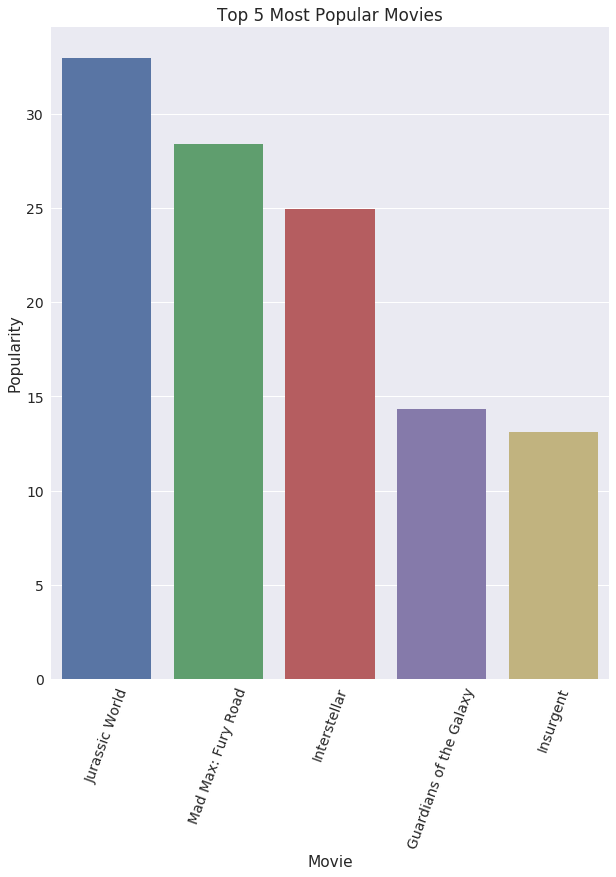

In [22]:
# Creating a dataframe that contains movies and popularity
movies_popularity = df[['original_title','popularity']]

# Plotting top 5 most popular movies
sns.set(rc={'figure.figsize' : (10,12)}, font_scale=1.4)

ax = sns.barplot(movies_popularity.sort_values(by='popularity', ascending=False).head(5).original_title,
                 movies_popularity.sort_values(by='popularity', ascending=False).head(5).popularity)


ax.set(xlabel='Movie', ylabel='Popularity', title= 'Top 5 Most Popular Movies')

# Rotating x-axis text
for movie in ax.get_xticklabels():
    movie.set_rotation(70)
    
plt.show()

### Research Question 5 (what's the correlation between vote count popularity?)

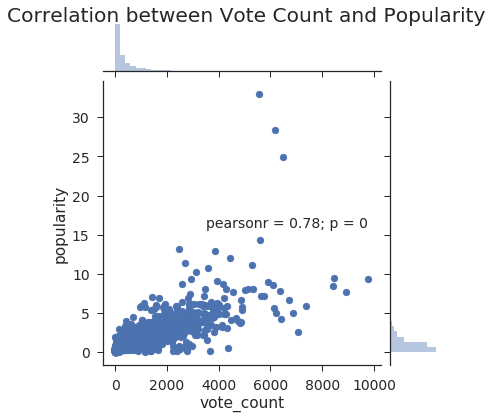

In [23]:
# Creaating a scatter plot showing the correlation between vote_count and popularity
sns.set(rc={'figure.figsize':(10,12)}, font_scale=1.4, style="ticks")


votes_popularity = sns.jointplot(x = "vote_count", y = "popularity", kind = "scatter", data = df)
votes_popularity.fig.suptitle('Correlation between Vote Count and Popularity');


The scatter suggests a strong correlation between Vote Count and Popularity. Hence, the more vote counts the movie has the more popular it is.

### Research Question 6  (What's the correlation between revenue and popularity?)

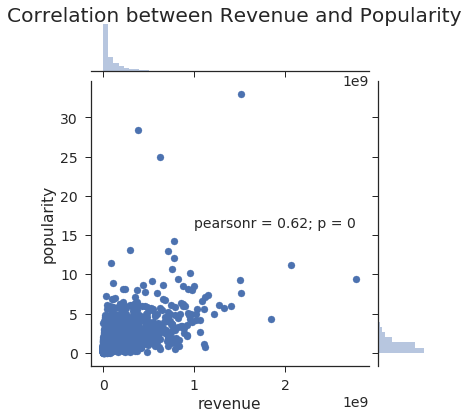

In [24]:
# Creaating a scatter plot showing the correlation between revenue and popularity
sns.set(rc={'figure.figsize':(10,12)}, font_scale=1.4, style="ticks")


budget_popularity = sns.jointplot(x = "revenue", y = "popularity", kind = "scatter", data = df)
budget_popularity.fig.suptitle('Correlation between Revenue and Popularity');


The scatter suggests a moderate correlation between Revenue and Popularity.

### Research Question 7 (What's the correlation between revenue and runtime?)

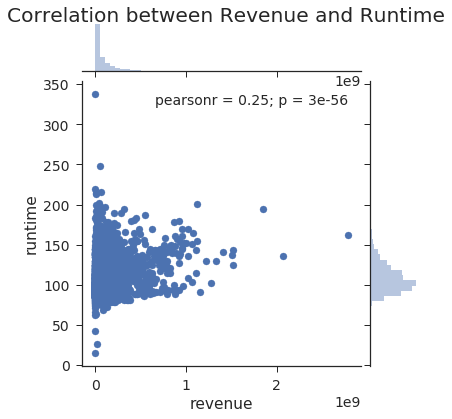

In [25]:
# Creaating a scatter plot showing the correlation between revenue and runtime
sns.set(rc={'figure.figsize':(10,12)}, font_scale=1.4, style="ticks")


budget_popularity = sns.jointplot(x = "revenue", y = "runtime", kind = "scatter", data = df)
budget_popularity.fig.suptitle('Correlation between Revenue and Runtime');

The scatter suggest a weak correlation between revenue and runtime.

<a id='conclusions'></a>
## Conclusions
The exploratory data anaylsis has shown the result of some investigations on movies budgets, revenues, runtime, as well as the top five movies with *Jurassic World* being the top movie of all time. Also, it has shown how votes are strongly correlated to popularity, revenues are moderately correlated to popularity, while revenues and runtime are weakly correlated.

### Limitations:
- Several entries had been removed due to missing data.
- Some columns with several entries where hard to analyze.

In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0